<a href="https://colab.research.google.com/github/athenaap/data_science_hw/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#For this homework, use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
#The Lead dataset is designed for a binary classification task,
#where the target variable is Converted (indicating whether a lead converted to customer, with values 0 or 1).
#The other columns are features that describe the lead's characteristics, behavior, and interactions.
#The explanation of the columns are given below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

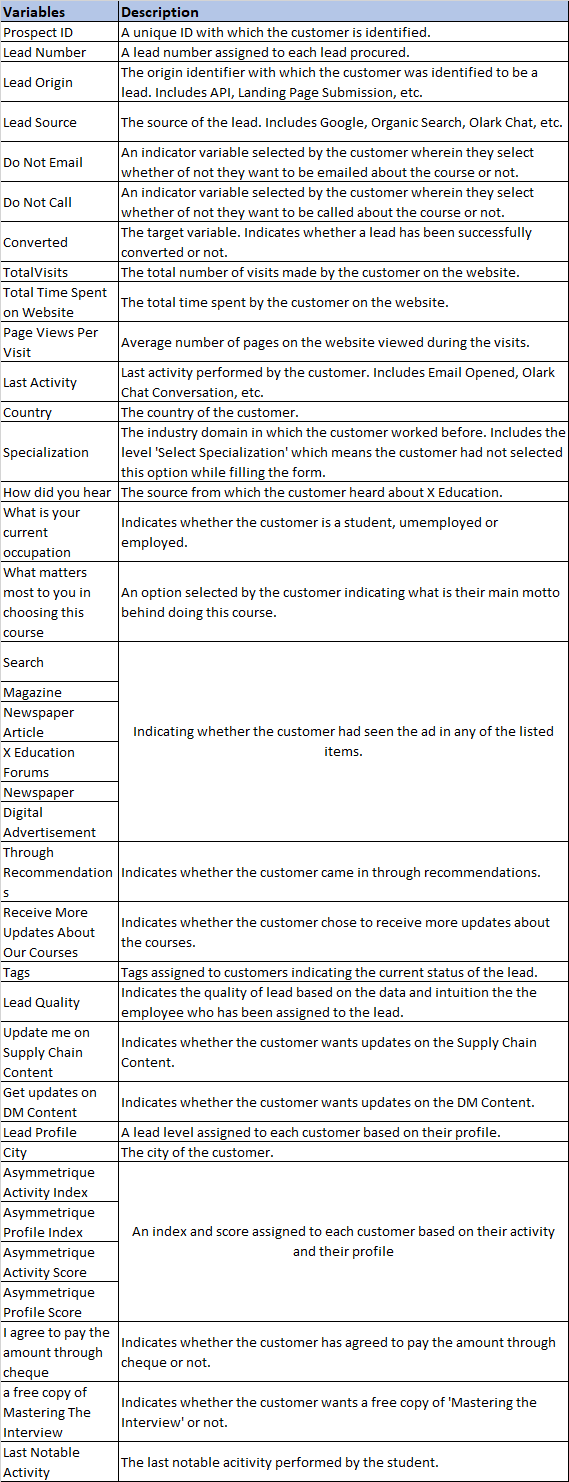

In [3]:
#Q1 (15 pt) -There are missing values in the Lead data.
#Replace missing values with the mean if the variable is numeric and  with the mode if the variable is categorical.
#Note: If the data type (Dtype) is object, the variable is categorical and
#if the data type (Dtype) is int64 or float64, the variable is numerical.

for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
      df[col] = df[col].fillna(df[col].mean())

Label encoding is a technique used in machine learning to convert categorical data into numerical format. Each unique category value is assigned an integer value. For example, if you have a categorical feature like "color" with values "red," "green," and "blue," label encoding might transform these into 0, 1, and 2, respectively. This is useful because many machine learning algorithms require numerical input. However, it can imply an ordinal relationship where none exists, which might not be appropriate for all datasets.

When to Use

Use label encoding for ordinal data or tree-based models.

Use dummy variables for nominal data or models sensitive to ordinal assumptions such as linear regression

In [4]:
from re import X
#Q2-(15 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID,	Lead Number  and Converted from the input variables and use Converted as target variables.
#Split data into train and test using 30% of the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = le.fit_transform(df[col])

X = df.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,6,0,0,0,0.0,0,0.0,10,12,15,6,4,0,0,0,0,0,0,0,0,0,8,1,0,0,4,4,1,1,15.0,15.0,0,0,8
1,1554,660728,0,7,0,0,0,5.0,674,2.5,5,12,15,6,4,0,0,0,0,0,0,0,0,0,14,2,0,0,4,4,1,1,15.0,15.0,0,0,4
2,5140,660727,1,1,0,0,1,2.0,1532,2.0,5,12,1,6,3,0,0,0,0,0,0,0,0,0,19,2,0,0,3,0,1,0,14.0,20.0,0,1,4
3,467,660719,1,1,0,0,0,1.0,305,1.0,13,12,11,9,4,0,0,0,0,0,0,0,0,0,14,3,0,0,4,0,1,0,13.0,17.0,0,0,8
4,1874,660681,1,3,0,0,1,2.0,1428,1.0,1,12,15,4,4,0,0,0,0,0,0,0,0,0,19,2,0,0,4,0,1,0,15.0,18.0,0,0,8


In [5]:
#Q3(10 pt) Assuming Converted = 1 represents the positive case (i.e., a lead converts into a customer),
# define what is false positive and false negative in this dataset?
#Which one is more important  metric (precison or recall) in this case? Why?


False negative is when prediction is negative meaning Conversion = 0 but actually it is positive Converson = 1. False positive is when prediction is positive Conversion = 1 but actually it is negative Conversion = 0.
I believe Recall would be more important, as it focuses on minimizing False Negatives, meaning minimal loss of conversions.

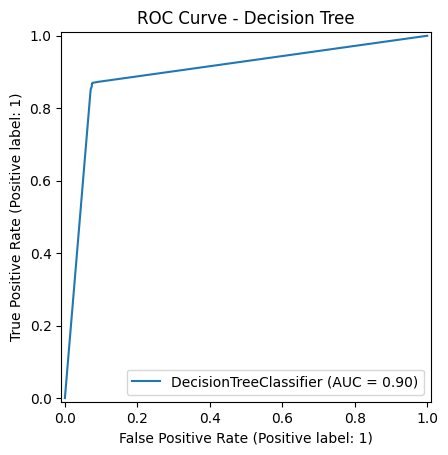

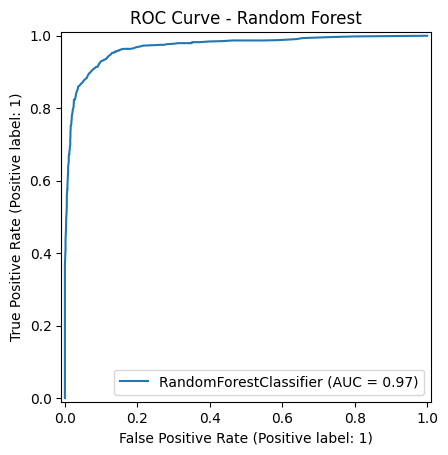

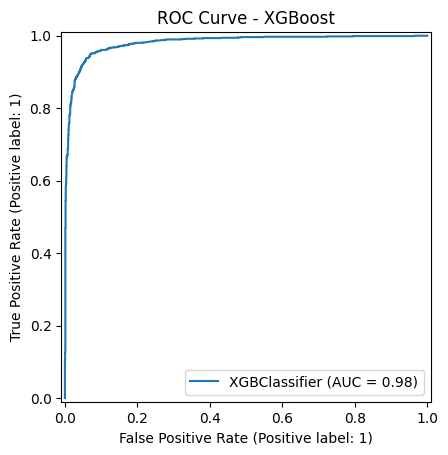

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416


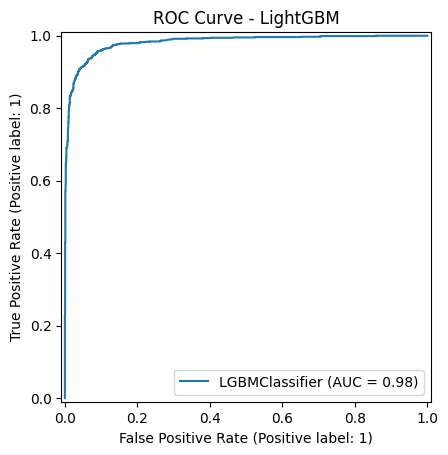

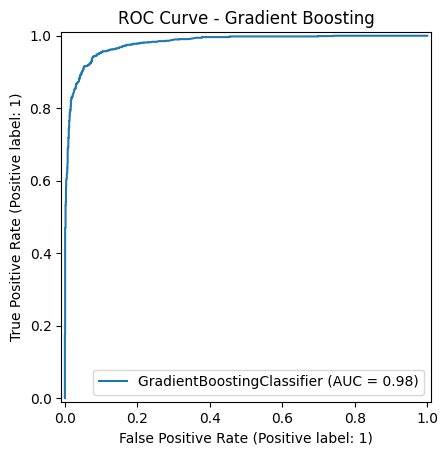

               Model  Accuracy  Precision    Recall       AUC
0      Decision Tree  0.902958   0.881132  0.867224  0.898723
1      Random Forest  0.920274   0.919608  0.870938  0.969931
2            XGBoost  0.937590   0.929658  0.908078  0.980960
3           LightGBM  0.938672   0.931494  0.909006  0.982191
4  Gradient Boosting  0.931457   0.930165  0.890436  0.980169


In [7]:
#Q4(60 pt)Use decison tree, random forest and boosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores,precison and recall  on test  data.
# Report confusion metrics as well for these methods on test  data.
# Get the AUC score for this methods and draw ROC curve on test  data. .
#Which methods gave  best performance on test data based on accuracy metric,precison, recall metric and AUC soore?

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


results = []

# Training
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc,
        "Confusion Matrix": cm
    })

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()

results_df = pd.DataFrame(results)
print(results_df[["Model", "Accuracy", "Precision", "Recall", "AUC"]])




In [8]:

best_accuracy = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision = results_df.loc[results_df['Precision'].idxmax()]
best_recall = results_df.loc[results_df['Recall'].idxmax()]
best_auc = results_df.loc[results_df['AUC'].idxmax()]

print("\nBest Models:")
print(f"Accuracy: {best_accuracy['Model']} ({best_accuracy['Accuracy']:.4f})")
print(f"Precision: {best_precision['Model']} ({best_precision['Precision']:.4f})")
print(f"Recall: {best_recall['Model']} ({best_recall['Recall']:.4f})")
print(f"AUC: {best_auc['Model']} ({best_auc['AUC']:.4f})")


Best Models:
- Accuracy: LightGBM (0.9387)
- Precision: LightGBM (0.9315)
- Recall: LightGBM (0.9090)
- AUC: LightGBM (0.9822)


As we see the best metrics are achieved by the LGBM model, overall boosting models are expected to give best results, which is the case in our experiment. Boosting models perform better due to their sequential error correction approach